<a href="https://colab.research.google.com/github/sa21262/datascience22/blob/main/Dissertation_codes/(2%2C2)b_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required Libraries  

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, GaussianNoise,Lambda,Dropout, Concatenate
from keras.models import Model
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import backend as K
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.constraints import max_norm 
from numpy.random import seed
seed(1)
from tensorflow.keras.utils import set_random_seed
set_random_seed(3)
import matplotlib.pyplot as plt                                                 
from scipy import interpolate

# Parameters Declaration 
Lenght of Message space, Number of bits per symbol, number of channel uses
and Rate of communication is defined here. 

In [ ]:
L_o_m  = 4                                                                      # Lenght of Message space(M) given by 2^number of bits 
bits = np.log2(L_o_m)                                                           # Number of bits 
bits = int(bits)                                                                # Converting it to int 
n = 2                                                                           # Number of channels(n) 
R = bits/n                                                                      # Communication rate(R) given by number of bits divided by number of channels 
print ('Lenght of Message space (M):',L_o_m,'Number of bits (k):',bits,'Number of channels (n):',n)

Lenght of Message space (M): 4 Number of bits (k): 2 Number of channels (n): 2


# Generating training data

In [ ]:
samples = 100000
labels = np.random.randint(L_o_m , size=samples)                                # generating N random numbers whose values are enclosed between 0 and (M-1)

# Performing Onehot Encoding
Each of the message in generated message space is onehot encoded. 

In [ ]:
training_data = []                                                              # Creating a empty list 
for i in labels:                         
    inp_vector = np.zeros(L_o_m)                                                # Creating a numpy array of size M                                                    
    inp_vector[i] = 1                                                           # Performing one hot encoding 
    training_data.append(inp_vector) 



In [ ]:
training_data = np.array(training_data)                                         # Transforming data to numpy array
print (training_data.shape)                                                     # Each of the sample out of the N generated samples is onehot encoded to vector of size M 

(100000, 4)


Verifying the one hot encoding performed on the generated data.  


In [ ]:
check_list = [23,45,97,115,278,369]
for i in check_list:
    print(labels[i],training_data[i])

2 [0. 0. 1. 0.]
3 [0. 0. 0. 1.]
0 [1. 0. 0. 0.]
0 [1. 0. 0. 0.]
2 [0. 0. 1. 0.]
3 [0. 0. 0. 1.]


# Defining the architecture of Autoencoder

In [ ]:
input_signal = Input(shape=(L_o_m,))                                            # After performing one hot encoding each input is vector of size M
encoded1 = Dense(L_o_m, activation='relu')(input_signal)                         # First layer is dense layer with relu activation function and M nuerons  
encoded2 = Dense(n, activation='linear')(encoded1)                               # Second layer is dense layer with linear activaton function and n_channel nuerons 
#encoded3 = Lambda(lambda x: np.sqrt(n)*K.l2_normalize(x,axis=1))(encoded2)      # Normalisation is performed to met the physical constraints (Energy Constraint)
encoded3 = BatchNormalization(gamma_constraint=max_norm(1.4142136))(encoded2) 


EbNo_train = 5.01187                                                            # coverted 7 db of EbNo
                                                                                # 10log(EbNo) = 7 db
encoded4 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded3)                 # As Variance is given by (1/(2*R*EbNo_train) 
                                                                                # Gausian noise is added by this layer 

decoded1 = Dense(L_o_m, activation='relu')(encoded4)                             # First layer of the decoder is dense layer with relu activation function and total M nuerons
decoded2 = Dense(L_o_m, activation='softmax')(decoded1)                          # Second layer of the decoder is dense layer with softmax activation function which outputs the probabilities 


autoencoder = Model(input_signal, decoded2)                                     # Autoencoder model is defined here 
adam = Adam(learning_rate=0.001)                                                # Adam optimizer is used with learning rate 0.01 to minimise the loss 

autoencoder.compile(optimizer=adam, loss='categorical_crossentropy')            # Autoencoder is compiled here and loss is defined as categorical crossentropy between the onehot encoded input vector and the output of the decoder 

# Summary of Autoencoder

In [ ]:
print (autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 gaussian_noise (GaussianNoi  (None, 2)                0         
 se)                                                             
                                                                 
 dense_2 (Dense)             (None, 4)                 12    

# Training the model 

In [ ]:
autoencoder.fit(training_data, training_data, epochs=150, batch_size=64)        # Autoencoder is fitted with the generated data                                         

Epoch 1/150
1563/1563 [==============================] - 9s 4ms/step - loss: 0.3973
Epoch 2/150
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0380
Epoch 3/150
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0199
Epoch 4/150
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0152
Epoch 5/150
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0142
Epoch 6/150
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0133
Epoch 7/150
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0125
Epoch 8/150
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0122
Epoch 9/150
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0116
Epoch 10/150
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0118
Epoch 11/150
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0110
Epoch 12/150
1563/1563 [==============================] - 3s 2ms/step - lo

# Encoder

In [ ]:
encoder = Model(input_signal, encoded3)                                         # Model of Encoder is Defined here  

# Decoder 

In [ ]:
encoded_input = Input(shape=(n,))                                               # Model for decoder is defined here  

decoder_1 = autoencoder.layers[-2](encoded_input)                               # Second last layer of the defined Autoencoder 
decoder_2 = autoencoder.layers[-1](decoder_1)                                   # Last layer of the defined Autoencoder 
decoder = Model(encoded_input, decoder_2)                                 

# Generating Test data 

In [ ]:
test_samples = 10000                                                            # Size of test samples 
                                                                                # t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data
                                                                                # by giving each datapoint a location in a two or three-dimensional map
test_labels = np.random.randint(L_o_m,size=test_samples)                        # Test data of size N is created with all values enclosed between 0 and M
test_data = []

for i in test_labels:
    test_vector = np.zeros(L_o_m)                                               # Numpy array of size M is created with all entries equal to zero 
    test_vector[i] = 1                                                          # performing One hot encoding on each entry of N 
    test_data.append(test_vector)
    
test_data = np.array(test_data)                                                 # Test data is converted to numpy array 
print(test_data.shape)                                                          # Shape of test_data is given by (N*M)

(10000, 4)


In [ ]:
test_num = 99                                                                   # Verifying the onehot encoding on generated test data 
print (test_data[test_num],test_labels[test_num])

[0. 0. 0. 1.] 3


# Constellation Diagram
Every message in the message space is encode to draw constellation diagram 

In [ ]:
scatter_plot = []                                                                
for i in range(0,L_o_m):                                                        # For all the messages in the message space 
    array1 = np.zeros(L_o_m)
    
    array1[i] = 1                                                               # onehot encoding of the each message
    scatter_plot.append(encoder.predict(np.expand_dims(array1,axis=0)))         # Encoding every possible entry of Messages needed to be sent 
scatter_plot = np.array(scatter_plot)                                           # As you can see for each of the sixteen possible values there is a complex representation 
print (scatter_plot.shape)

(4, 1, 2)


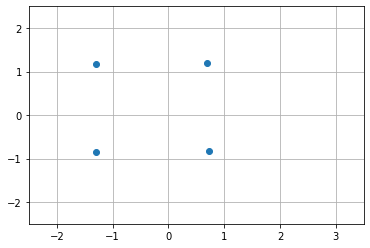

In [ ]:
scatter_plot = scatter_plot.reshape(L_o_m,2,1)                                  # Constellation diagram
plt.scatter(scatter_plot[:,0],scatter_plot[:,1] )                               # quadrature phase shift keying (QPSK) for (2,2)
plt.axis((-2.5,3.5,-2.5,2.5))                                                   # Rotated 16 PSK constellation for (2,4)

plt.grid()
plt.show()

# Calculating Bit Error Rate 

In [ ]:
def frange(i, j, jump):                                                         # For represnting SNR after overy 0.5 db interval 
  while i < j:
    yield i
    i += jump

In [ ]:
SNR_range = list(frange(-4,12,0.5))                                             # Range of SNR 
print(len(SNR_range))                                                           # In total there are 25 intervals
  
BER = [None]*len(SNR_range)                                                  
                                                 
for x in range(0,len(SNR_range)):                                               # for each of the value of SNR 
    EbNo=10.0**(SNR_range[x]/10.0)                                              # to covert each value of SNR from db's
    noise_std = np.sqrt(1/(2*R*EbNo))                                           # Standard deviation of the added noise layer 
    mean = 0                                                                    # Mean of the added noise layer 
    errors = 0
    
    noise = noise_std * np.random.randn(test_samples,n)                         # Noise is added to encoded data
    encoded_vector = encoder.predict(test_data)                                 # Encoded test data 
    noise_added_vector = encoded_vector + noise                                 # Encoded test data + Noise

    decoded_vector =  decoder.predict(noise_added_vector)                       # Decoded data 
    pred_output = np.argmax(decoded_vector,axis=1)                              # As the decoder last layer is Softmax so the index with the highest probabilty is chosen
    errors = (pred_output != test_labels)                                       # It checks for each of the test_sample is the predicted value is same as the original value 
    
    errors =  errors.astype(int).sum()                                          # Adds up the total Error bits in each of the iteration for N values  
        
    BER[x] = errors / test_samples                                              # BER is given by total  wrongly identified examples over total number of Examples

    print ('SNR (Signal to noise ratio):',SNR_range[x],'BER (Bit Error Rate):',BER[x])

32
SNR (Signal to noise ratio): -4 BER (Bit Error Rate): 0.3331
SNR (Signal to noise ratio): -3.5 BER (Bit Error Rate): 0.309
SNR (Signal to noise ratio): -3.0 BER (Bit Error Rate): 0.2819
SNR (Signal to noise ratio): -2.5 BER (Bit Error Rate): 0.2557
SNR (Signal to noise ratio): -2.0 BER (Bit Error Rate): 0.2374
SNR (Signal to noise ratio): -1.5 BER (Bit Error Rate): 0.2122
SNR (Signal to noise ratio): -1.0 BER (Bit Error Rate): 0.2
SNR (Signal to noise ratio): -0.5 BER (Bit Error Rate): 0.1725
SNR (Signal to noise ratio): 0.0 BER (Bit Error Rate): 0.1465
SNR (Signal to noise ratio): 0.5 BER (Bit Error Rate): 0.1324
SNR (Signal to noise ratio): 1.0 BER (Bit Error Rate): 0.1005
SNR (Signal to noise ratio): 1.5 BER (Bit Error Rate): 0.0855
SNR (Signal to noise ratio): 2.0 BER (Bit Error Rate): 0.069
SNR (Signal to noise ratio): 2.5 BER (Bit Error Rate): 0.0574
SNR (Signal to noise ratio): 3.0 BER (Bit Error Rate): 0.042
SNR (Signal to noise ratio): 3.5 BER (Bit Error Rate): 0.0308
SNR (

# Plot of Bit Error Rate against Range of SNR

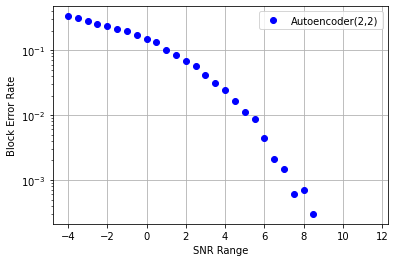

In [ ]:

plt.plot(SNR_range, BER, 'bo',label='Autoencoder(2,2)')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)